We'll train our model by adjusting the weights slightly many times to make better predictions, using an optimization technique called gradient descent. Let's begin by importing Numpy and PyTorch.

In [ ]:
import numpy as np
import torch

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [ ]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [ ]:
#typically csv files are read as numpys, we now convert into numpy
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


The weights and biases (w11, w12,... w23, b1 & b2) can also be represented as matrices, initialized as random values. The first row of w and the first element of b are used to predict the first target variable, i.e., yield of apples, and similarly, the second for oranges.

In [ ]:
# Weights and biases
# randn chooses between -1 to 1
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.4152, -0.5620, -1.4615],
        [-0.9395, -0.8866, -1.3162]], requires_grad=True)
tensor([ 1.2517, -0.7814], requires_grad=True)


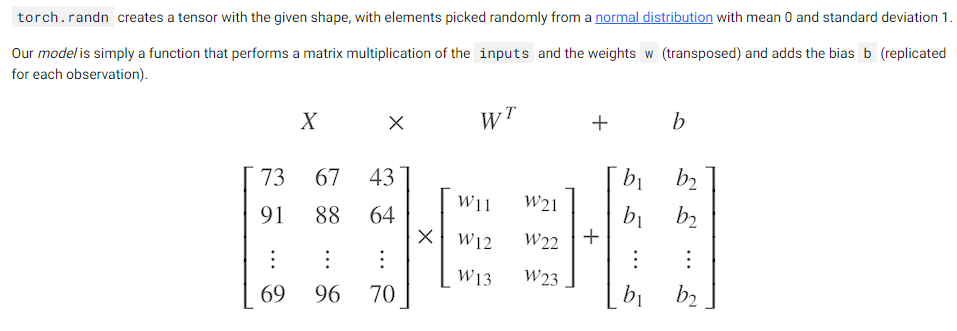

In [ ]:
def model (x):
  return x @ w.t()+b

# @ represents matrix multiplication in PyTorch, and the .t method returns the transpose of a tensor.
# The matrix obtained by passing the input data into the model is a set of predictions for the target variables.

In [ ]:
#generating predictions
preds = model(inputs)
print(preds)
print(targets)

tensor([[-129.5553, -185.3581],
        [-179.5218, -248.5263],
        [-194.9427, -277.6529],
        [-119.3408, -183.4280],
        [-183.6515, -242.8477]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


You can see a big difference between our model's predictions and the actual targets because we've initialized our model with random weights and biases. Obviously, we can't expect a randomly initialized model to just work.

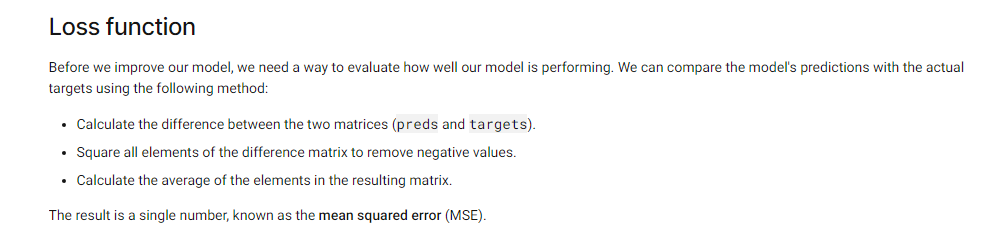

In [ ]:
def mse (t1,t2):
  diff = t1 - t2
  diff_sqr = diff * diff
  return torch.sum(diff_sqr) / diff.numel()

In [ ]:
#computing loss
loss = mse(preds,targets)
print(loss)

tensor(83854.3125, grad_fn=<DivBackward0>)


Here’s how we can interpret the result: On average, each element in the prediction differs from the actual target by the square root of the loss. And that’s pretty bad, considering the numbers we are trying to predict are themselves in the range 50–200. The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-19752.3516, -22204.5273, -13631.2334],
        [-26725.1973, -29422.1172, -18130.6250]])
tensor([-237.6024, -319.5626])


In [ ]:
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5
  w.grad.zero_()
  b.grad.zero_()

In [ ]:
print(w)
print(b)

tensor([[-0.2177, -0.3399, -1.3252],
        [-0.6722, -0.5923, -1.1349]], requires_grad=True)
tensor([ 1.2565, -0.7750], requires_grad=True)


In [ ]:
for i in range(500):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [ ]:
#calculating new loss
preds = model(inputs)
loss = mse(preds,targets)
print(loss)

tensor(27.2931, grad_fn=<DivBackward0>)


In [ ]:
preds

tensor([[ 57.8512,  70.6029],
        [ 78.2284,  97.3116],
        [126.6426, 140.1221],
        [ 23.3916,  39.1050],
        [ 93.9003, 111.9254]], grad_fn=<AddBackward0>)

In [ ]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

Linear regression using PyTorch built-ins

We've implemented linear regression & gradient descent model using some basic tensor operations. However, since this is a common pattern in deep learning, PyTorch provides several built-in functions and classes to make it easy to create and train models with just a few lines of code.

Let's begin by importing the torch.nn package from PyTorch, which contains utility classes for building neural networks.

In [ ]:
import torch.nn as nn

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]


(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

The TensorDataset allows us to access a small section of the training data using the array indexing notation ([0:3] in the above code). It returns a tuple with two elements. The first element contains the input variables for the selected rows, and the second contains the targets.

We'll also create a DataLoader, which can split the data into batches of a predefined size while training. It also provides other utilities like shuffling and random sampling of the data.

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

#In each iteration, the data loader returns one batch of data with the given batch size. If shuffle is set to True, it shuffles the training data before creating batches. Shuffling helps randomize the input to the optimization algorithm, leading to a faster reduction in the loss.

In [ ]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 68.,  97.,  70.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [ 73.,  66.,  44.],
        [101.,  44.,  37.]])
tensor([[102., 120.],
        [ 82., 100.],
        [118., 134.],
        [ 57.,  69.],
        [ 21.,  38.]])


In [ ]:
# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.0705,  0.5524, -0.2701],
        [ 0.4766,  0.0352, -0.1486]], requires_grad=True)
Parameter containing:
tensor([0.5448, 0.0142], requires_grad=True)


In [ ]:
#PyTorch models also have a helpful .parameters method, which returns a list containing all the weights and bias matrices present in the model. For our linear regression model, we have one weight matrix and one bias matrix.
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0705,  0.5524, -0.2701],
         [ 0.4766,  0.0352, -0.1486]], requires_grad=True),
 Parameter containing:
 tensor([0.5448, 0.0142], requires_grad=True)]

In [ ]:
# Generate predictions
preds = model(inputs)
preds

tensor([[31.0891, 30.7701],
        [38.2869, 36.9657],
        [65.0365, 37.5688],
        [21.4962, 44.6394],
        [39.5347, 25.8699],
        [30.6072, 31.2115],
        [37.4644, 36.7819],
        [64.8370, 37.8967],
        [21.9781, 44.1980],
        [39.1941, 25.2447],
        [30.2666, 30.5863],
        [37.8050, 37.4071],
        [65.8590, 37.7526],
        [21.8368, 45.2646],
        [40.0167, 25.4285]], grad_fn=<AddmmBackward0>)

In [ ]:
# Import nn.functional
import torch.nn.functional as F

In [ ]:
# Define loss function
loss_fn = F.mse_loss

In [ ]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(3282.0107, grad_fn=<MseLossBackward0>)


Instead of manually manipulating the model's weights & biases using gradients, we can use the optimizer optim.SGD. SGD is short for "stochastic gradient descent". The term stochastic indicates that samples are selected in random batches instead of as a single group.

In [ ]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

# Note that model.parameters() is passed as an argument to optim.SGD so that the optimizer knows which matrices should be modified during the update step. 
# Also, we can specify a learning rate that controls the amount by which the parameters are modified.

In [ ]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 8.2783
Epoch [20/100], Loss: 4.2361
Epoch [30/100], Loss: 8.3881
Epoch [40/100], Loss: 7.9238
Epoch [50/100], Loss: 2.5261
Epoch [60/100], Loss: 5.3869
Epoch [70/100], Loss: 6.7435
Epoch [80/100], Loss: 8.7380
Epoch [90/100], Loss: 2.1847
Epoch [100/100], Loss: 6.7921


In [ ]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 57.2561,  70.5583],
        [ 80.7311,  99.2960],
        [121.0572, 135.4687],
        [ 21.5968,  38.4657],
        [ 99.2215, 115.9190],
        [ 55.9766,  69.4527],
        [ 80.3384,  99.1579],
        [121.2101, 135.9430],
        [ 22.8763,  39.5712],
        [100.1081, 116.8865],
        [ 56.8633,  70.4202],
        [ 79.4517,  98.1904],
        [121.4500, 135.6068],
        [ 20.7102,  37.4981],
        [100.5009, 117.0245]], grad_fn=<AddmmBackward0>)

In [ ]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])